# **Question 6**

Clustered after 12 iterations


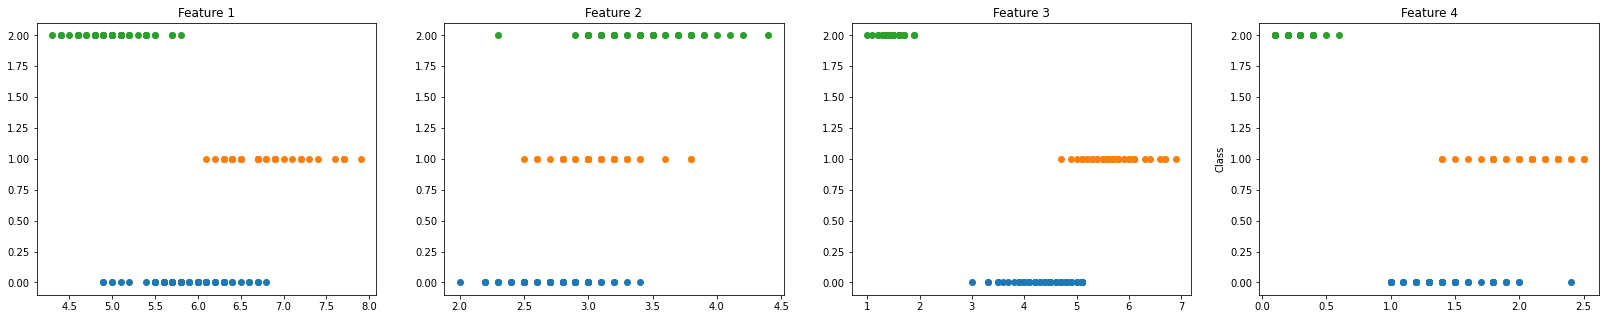

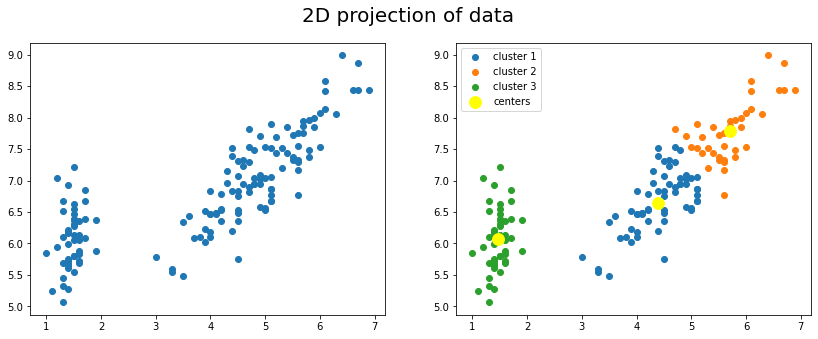

In [1]:
root = "/content/drive/My Drive/2018AAPS1242H_NNFL (Assignment 1)/"
import io
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

data2 = np.array(pd.read_excel(root+"Data/data2.xlsx",header=None))

def distance(start,end):
  dist = np.sum((end-start)**2,axis=1)
  dist = np.sqrt(dist)
  return dist

def project_2d(data,del_col=None):
  if del_col is None:
    dev = np.std(data,axis=0)
    del_col = np.argmax(dev)
  X = data[:,del_col]
  dist_cols = np.delete(data,del_col,axis=1)
  orig = np.zeros((data.shape[0],data.shape[1]-1))
  Y = distance(orig,dist_cols)
  projection = np.vstack((X, Y)).T
  return projection, del_col

def reset_clusters(data,clusters,cache=None,iter=0):
  k = len(clusters)
  k_means = []
  truth = [True]
  for i in range(k):
    k_means.append(np.mean(clusters[i],axis=0,keepdims=True)) 
    if cache != None: 
      truth.append(distance(k_means[i],cache[i])<=0.00001)
  if cache != None and all(truth): 
    return clusters, iter, k_means
  else:
    new_clusters = []
    for i in range(k):
      new_clusters.append([])
    centre_dists = []
    for mean in k_means:
      centre_dists.append(distance(mean,data))
    centre_dists = np.array(centre_dists)
    nearest_mean = np.argmin(centre_dists,axis=0)
    for i in range(nearest_mean.shape[0]):
      new_clusters[nearest_mean[i]].append(data[i])
    return reset_clusters(data,new_clusters,k_means,iter+1)

def k_means_cluster(k,data):
  np.random.seed(0)
  pr,del_col = project_2d(data2)
  np.random.shuffle(data)
  temp_clusters = np.array_split(data,k,axis=0)
  clusters,iter,centers = reset_clusters(data,temp_clusters)
  print("Clustered after {} iterations".format(iter))
  fig,axs = plt.subplots(1,data.shape[1])
  fig.set_figheight(5)
  fig.set_figwidth(28)
  for i in range(data.shape[1]):
    for j in range(k):
      axs[i].scatter(x=np.array(clusters[j])[:,i],y=[j]*len(clusters[j]))
      axs[i].set_title('Feature '+str(i+1))
      plt.ylabel('Class')
  fig, axs = plt.subplots(1,2)
  fig.set_figheight(5)
  fig.set_figwidth(14)
  fig.suptitle('2D projection of data', fontsize=20)
  axs[0].scatter(pr[:,0],pr[:,1], label = 'unclustered data')
  for i in range(k):
    name = "cluster "+ str(i+1)
    pr,_ = project_2d(np.array(clusters[i]),del_col)
    axs[1].scatter(pr[:,0],pr[:,1], label = name)
  cl,_ = project_2d(np.squeeze(np.array(centers)),del_col)
  axs[1].scatter(cl[:,0],cl[:,1], label = "centers", color="yellow",marker="o",s=140)
  plt.legend(loc='best')
  return clusters,centers

ans, cent = k_means_cluster(3,data2)

# **Question 7**

In [2]:
import math 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Return the column at specified index
def getcol(data,c):
    col = []
    for i in range(len(data)):
        col.append(data[i][c])
    return col

def set(y):
    for i in range(len(y)):
        if(y[i]>0.5):
            y[i] = 1
        if(y[i]<0.5):
            y[i] = 0
    return y

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

#Updated values of m,c after one iteration of gradient descent
def wt_update(m1,m2,m3,m4,c,x,y):
    sum_m1 = 0
    sum_m2 = 0
    sum_m3 = 0
    sum_m4 = 0
    sum_c = 0
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + c
        yp[i] = sigmoid(yp[i])
        sum_m1 = sum_m1 - (y[i]-yp[i])*x[i,0]
        sum_m2 = sum_m2 - (y[i]-yp[i])*x[i,1]
        sum_m3 = sum_m3 - (y[i]-yp[i])*x[i,2]
        sum_m4 = sum_m4 - (y[i]-yp[i])*x[i,3]
        sum_c = sum_c - (y[i]-yp[i])
    m1 = m1 - 0.05*sum_m1
    m2 = m2 - 0.05*sum_m2
    m3 = m3 - 0.05*sum_m3
    m4 = m4 - 0.05*sum_m4
    c = c - 0.05*sum_c
    return m1,m2,m3,m4,c

#Slope and intercept of y^
def linreg(x,y):
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    c = 0
    iters = 1000
    i = 0
    while(i<iters):
        m1,m2,m3,m4,c = wt_update(m1,m2,m3,m4,c,x,y)
        i = i+1
    return m1,m2,m3,m4,c

#Implement min-max normalization
def norm(data):
    ndata = data
    for i in range(5):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/((maxval-minval)+0.05)
    return ndata

#Import the data
data = pd.read_excel(root+"Data/data3.xlsx",header=None)

#Normalize the data
data = np.asarray(data)
data = norm(data)

#Split into dependent and independent variables
x = data[:,:-1]
y = data[:,-1]

#Split into testing and training sets
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.4,random_state=45)
m1, m2, m3, m4, c = linreg(x_tr,y_tr)
x = x_ts
yp = [0 for i in range(len(x))]
for i in range(len(x)):
    yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + c
    yp[i] = sigmoid(yp[i])
y_ts = set(y_ts)
yp = set(yp)
y_actual = pd.Series(y_ts, name='Actual')
y_pred = pd.Series(yp, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)
confmat = np.asarray(confmat)
tp = confmat[1][1]
tn = confmat[0][0]
fp = confmat[0][1]
fn = confmat[1][0]

Acc = (tp+tn)/(tp+tn+fp+fn)
SE = tp/(tp+fn)
SP = tn/(tn+fp)

print('Accuracy : ' + str(Acc))
print('Sensitivity : ' + str(SE))
print('Specificity : ' + str(SP))

Predicted   0   1
Actual           
0.0        22   0
1.0         0  18
Accuracy : 1.0
Sensitivity : 1.0
Specificity : 1.0


# **Question 8 : One vs One**

In [3]:
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

#Return the column at specified index
def getcol(data,c):
    col = []
    for i in range(len(data)):
        col.append(data[i][c])
    return col

def set(y):
    for i in range(len(y)):
        if(y[i]>=0.5):
            y[i] = 1
        if(y[i]<0.5):
            y[i] = 0
    return y

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

#Updated values of m,c after one iteration of gradient descent
def wt_update(m1,m2,m3,m4,m5,m6,m7,c,x,y):
    sum_m1 = 0
    sum_m2 = 0
    sum_m3 = 0
    sum_m4 = 0
    sum_m5 = 0
    sum_m6 = 0
    sum_m7 = 0
    sum_c = 0
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
        yp[i] = sigmoid(yp[i])
        sum_m1 = sum_m1 - (y[i]-yp[i])*x[i,0]
        sum_m2 = sum_m2 - (y[i]-yp[i])*x[i,1]
        sum_m3 = sum_m3 - (y[i]-yp[i])*x[i,2]
        sum_m4 = sum_m4 - (y[i]-yp[i])*x[i,3]
        sum_m5 = sum_m5 - (y[i]-yp[i])*x[i,4]
        sum_m6 = sum_m6 - (y[i]-yp[i])*x[i,5]
        sum_m7 = sum_m7 - (y[i]-yp[i])*x[i,6]
        sum_c = sum_c - (y[i]-yp[i])
    m1 = m1 - 0.1*sum_m1
    m2 = m2 - 0.1*sum_m2
    m3 = m3 - 0.1*sum_m3
    m4 = m4 - 0.1*sum_m4
    m5 = m5 - 0.1*sum_m5
    m6 = m6 - 0.1*sum_m6
    m7 = m7 - 0.1*sum_m7
    c = c - 0.1*sum_c
    return m1,m2,m3,m4,m5,m6,m7,c

#Slope and intercept of y^
def linreg(x,y):
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    m5 = 0
    m6 = 0
    m7 = 0
    c = 0
    iters = 2000
    i = 0
    while(i<iters):
        m1,m2,m3,m4,m5,m6,m7,c = wt_update(m1,m2,m3,m4,m5,m6,m7,c,x,y)
        i = i+1
    return m1,m2,m3,m4,m5,m6,m7,c

#Implement min-max normalization
def norm(data):
    ndata = data
    for i in range(7):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/((maxval-minval)+0.05)
    return ndata


#Import the data
data = pd.read_excel(root+"Data/data4.xlsx",header=None)
data = np.asarray(data)
y = data[:,-1]
data = norm(data)
x = data[:,:-1]


#Split into testing and training sets
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.4)

y1_tr = [] 
y2_tr = [] 
y3_tr = [] 
x1_tr = []
x2_tr = []
x3_tr = []
for i in range(len(y_tr)):
    if(y_tr[i] != 3):
        y1_tr.append(y_tr[i])
        x1_tr.append(x_tr[i])
    if(y_tr[i] != 2):
        y2_tr.append(y_tr[i])
        x2_tr.append(x_tr[i])
    if(y_tr[i] != 1):
        y3_tr.append(y_tr[i])
        x3_tr.append(x_tr[i])

x1_tr = np.asarray(x1_tr)
x2_tr = np.asarray(x2_tr)
x3_tr = np.asarray(x3_tr)

#For 1 vs 2, we consider 1 as positive class
for i in range(len(y1_tr)):
    if y1_tr[i] == 1:
        y1_tr[i] = 1
    else:
        y1_tr[i] = 0 

#For 1 vs 3, we consider 3 as positive class
for i in range(len(y2_tr)):
    if y2_tr[i] == 3:
        y2_tr[i] = 1
    else:
        y2_tr[i] = 0 

#For 2 vs 3, we consider 2 as positive class
for i in range(len(y3_tr)):
    if y3_tr[i] == 2:
        y3_tr[i] = 1
    else:
        y3_tr[i] = 0 

x = x_ts

m1,m2,m3,m4,m5,m6,m7,c = linreg(x1_tr,y1_tr)
yp1 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp1[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp1[i] = sigmoid(yp1[i])
yp1 = set(yp1)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x2_tr,y2_tr)
yp2 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp2[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp2[i] = sigmoid(yp2[i])
yp2 = set(yp2)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x3_tr,y3_tr)
yp3 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp3[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp3[i] = sigmoid(yp3[i])
yp3 = set(yp3)


cval = [0 for i in range(len(y_ts))]
for i in range(len(y_ts)):
    if (yp1[i] == 1 and yp2[i] == 0):
        cval[i] = 1.0
    if (yp1[i] == 0 and yp3[i] == 1):
        cval[i] = 2.0
    if (yp2[i] == 1 and yp3[i] == 0):
        cval[i] = 3.0


for i in range(len(cval)):
    if (cval[i] == 0):
        cval[i] = 'None'
y_actual = pd.Series(y_ts, name='Actual')
y_pred = pd.Series(cval, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)

confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))


Predicted  1.0  2.0  3.0
Actual                  
1.0         18    0    0
2.0          0   21    1
3.0          0    1   19
Overall Accuracy : 0.9666666666666667
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9545454545454546
Accuracy of class 3 : 0.95


# **Question 8 : One vs All**

In [4]:
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

#Return the column at specified index
def getcol(data,c):
    col = []
    for i in range(len(data)):
        col.append(data[i][c])
    return col

def set(y):
    for i in range(len(y)):
        if(y[i]>=0.5):
            y[i] = 1
        if(y[i]<0.5):
            y[i] = 0
    return y

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

#Updated values of m,c after one iteration of gradient descent
def wt_update(m1,m2,m3,m4,m5,m6,m7,c,x,y):
    sum_m1 = 0
    sum_m2 = 0
    sum_m3 = 0
    sum_m4 = 0
    sum_m5 = 0
    sum_m6 = 0
    sum_m7 = 0
    sum_c = 0
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
        yp[i] = sigmoid(yp[i])
        sum_m1 = sum_m1 - (y[i]-yp[i])*x[i,0]
        sum_m2 = sum_m2 - (y[i]-yp[i])*x[i,1]
        sum_m3 = sum_m3 - (y[i]-yp[i])*x[i,2]
        sum_m4 = sum_m4 - (y[i]-yp[i])*x[i,3]
        sum_m5 = sum_m5 - (y[i]-yp[i])*x[i,4]
        sum_m6 = sum_m6 - (y[i]-yp[i])*x[i,5]
        sum_m7 = sum_m7 - (y[i]-yp[i])*x[i,6]
        sum_c = sum_c - (y[i]-yp[i])
    m1 = m1 - 0.1*sum_m1
    m2 = m2 - 0.1*sum_m2
    m3 = m3 - 0.1*sum_m3
    m4 = m4 - 0.1*sum_m4
    m5 = m5 - 0.1*sum_m5
    m6 = m6 - 0.1*sum_m6
    m7 = m7 - 0.1*sum_m7
    c = c - 0.1*sum_c
    return m1,m2,m3,m4,m5,m6,m7,c

#Slope and intercept of y^
def linreg(x,y):
    m1 = 0
    m2 = 0
    m3 = 0
    m4 = 0
    m5 = 0
    m6 = 0
    m7 = 0
    c = 0
    iters = 2000
    i = 0
    while(i<iters):
        m1,m2,m3,m4,m5,m6,m7,c = wt_update(m1,m2,m3,m4,m5,m6,m7,c,x,y)
        i = i+1
    return m1,m2,m3,m4,m5,m6,m7,c

#Implement min-max normalization
def norm(data):
    ndata = data
    for i in range(7):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/((maxval-minval)+0.05)
    return ndata


#Import the data
data = pd.read_excel(root+"Data/data4.xlsx",header=None)
data = np.asarray(data)
y = data[:,-1]
data = norm(data)
x = data[:,:-1]


#Split into testing and training sets
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size=0.4,random_state=5)

y1_tr = [1 for i in range(len(y_tr))]
y2_tr = [1 for i in range(len(y_tr))]
y3_tr = [1 for i in range(len(y_tr))]
for i in range(len(y_tr)):
    if(y_tr[i] != 1):
        y1_tr[i] = 0
    if(y_tr[i] != 2):
        y2_tr[i] = 0
    if(y_tr[i] != 3):
        y3_tr[i] = 0

x = x_ts

m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y1_tr)
yp1 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp1[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp1[i] = sigmoid(yp1[i])
yp1 = set(yp1)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y2_tr)
yp2 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp2[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp2[i] = sigmoid(yp2[i])
yp2 = set(yp2)

m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y3_tr)
yp3 = [0 for i in range(len(x))]
for i in range(len(x)):
    yp3[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
    yp3[i] = sigmoid(yp3[i])
yp3 = set(yp3)

cval = [0 for i in range(len(y_ts))]
for i in range(len(y_ts)):
    if (yp1[i] == 1):
        cval[i] = 1.0
    if (yp2[i] == 1):
        cval[i] = 2.0
    if (yp3[i] == 1):
        cval[i] = 3.0


for i in range(len(cval)):
    if (cval[i] == 0):
        cval[i] = 'None'
y_actual = pd.Series(y_ts, name='Actual')
y_pred = pd.Series(cval, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)

confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))

Predicted  1.0  2.0  3.0
Actual                  
1.0         20    0    0
2.0          0   20    1
3.0          0    2   17
Overall Accuracy : 0.95
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9523809523809523
Accuracy of class 3 : 0.8947368421052632


# **Question 9**

In [5]:
import pandas as pd
import math 
import numpy as np

#Return the column at specified index
def getcol(data,c):
    col = []
    for i in range(len(data)):
        col.append(data[i][c])
    return col

def set(y):
    for i in range(len(y)):
        if(y[i]>=0.5):
            y[i] = 1
        if(y[i]<0.5):
            y[i] = 0
    return y

def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

#Updated values of m,c after one iteration of gradient descent
def wt_update(m1,m2,m3,m4,m5,m6,m7,c,x,y):
    sum_m1,sum_m2,sum_m3,sum_m4,sum_m5,sum_m6,sum_m7,sum_c = [0]*8
    yp = [0 for i in range(len(x))]
    for i in range(len(x)):
        yp[i] = (m1*x[i,0]) + (m2*x[i,1]) + (m3*x[i,2]) + (m4*x[i,3]) + (m5*x[i,4]) + (m6*x[i,5]) + (m7*x[i,6]) + c
        yp[i] = sigmoid(yp[i])
        sum_m1 -= (y[i]-yp[i])*x[i,0]
        sum_m2 -= (y[i]-yp[i])*x[i,1]
        sum_m3 -= (y[i]-yp[i])*x[i,2]
        sum_m4 -= (y[i]-yp[i])*x[i,3]
        sum_m5 -= (y[i]-yp[i])*x[i,4]
        sum_m6 -= (y[i]-yp[i])*x[i,5]
        sum_m7 -= (y[i]-yp[i])*x[i,6]
        sum_c -=  (y[i]-yp[i])
    m1 -= 0.1*sum_m1
    m2 -= 0.1*sum_m2
    m3 -= 0.1*sum_m3
    m4 -= 0.1*sum_m4
    m5 -= 0.1*sum_m5
    m6 -= 0.1*sum_m6
    m7 -= 0.1*sum_m7
    c -= 0.1*sum_c
    return m1,m2,m3,m4,m5,m6,m7,c

#Slope and intercept of y^
def linreg(x,y):

    m1,m2,m3,m4,m5,m6,m7,c,i = [0]*9
    iters = 2000
    while(i<iters):
        m1,m2,m3,m4,m5,m6,m7,c = wt_update(m1,m2,m3,m4,m5,m6,m7,c,x,y)
        i = i+1
    return m1,m2,m3,m4,m5,m6,m7,c

#Implement min-max normalization
def norm(data):
    ndata = data
    for i in range(7):
        maxval = max(getcol(data,i))
        minval = min(getcol(data,i))
        for j in range(len(data)):
            ndata[j][i] = (data[j][i]-minval)/((maxval-minval)+0.05)
    return ndata


#Import the data
data = pd.read_excel(root+"Data/data4.xlsx",header=None)
data = np.asarray(data)

y = data[:,-1]
data = norm(data)
x = data[:,:-1]

rand_index = np.arange(len(x))
np.random.shuffle(rand_index)
x = x[rand_index]
y = y[rand_index]

Acc_list = []
Acc1_list = []
Acc2_list = []
Acc3_list = []

p = 0
q = int(len(y)/5)
for folds in range(5):

    #Split into testing and training sets
    x_ts = x[p:q,:]
    y_ts = y[p:q]
    x_tr = np.concatenate((x[:p,:],x[q:,:]),axis=0)
    y_tr = np.concatenate((y[:p],y[q:]),axis=0)

    y1_tr = [1 for i in range(len(y_tr))]
    y2_tr = [1 for i in range(len(y_tr))]
    y3_tr = [1 for i in range(len(y_tr))]
    for i in range(len(y_tr)):
        if(y_tr[i] != 1):
            y1_tr[i] = 0
        if(y_tr[i] != 2):
            y2_tr[i] = 0
        if(y_tr[i] != 3):
            y3_tr[i] = 0

    m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y1_tr)
    yp1 = [0 for i in range(len(x_ts))]

    for i in range(len(x_ts)):
        yp1[i] = (m1*x_ts[i,0]) + (m2*x_ts[i,1]) + (m3*x_ts[i,2]) + (m4*x_ts[i,3]) + (m5*x_ts[i,4]) + (m6*x_ts[i,5]) + (m7*x_ts[i,6]) + c
        yp1[i] = sigmoid(yp1[i])
    yp1 = set(yp1)


    m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y2_tr)
    yp2 = [0 for i in range(len(x_ts))]

    for i in range(len(x_ts)):
        yp2[i] = (m1*x_ts[i,0]) + (m2*x_ts[i,1]) + (m3*x_ts[i,2]) + (m4*x_ts[i,3]) + (m5*x_ts[i,4]) + (m6*x_ts[i,5]) + (m7*x_ts[i,6]) + c
        yp2[i] = sigmoid(yp2[i])
    yp2 = set(yp2)


    m1,m2,m3,m4,m5,m6,m7,c = linreg(x_tr,y3_tr)
    yp3 = [0 for i in range(len(x_ts))]

    for i in range(len(x_ts)):
        yp3[i] = (m1*x_ts[i,0]) + (m2*x_ts[i,1]) + (m3*x_ts[i,2]) + (m4*x_ts[i,3]) + (m5*x_ts[i,4]) + (m6*x_ts[i,5]) + (m7*x_ts[i,6]) + c
        yp3[i] = sigmoid(yp3[i])
    yp3 = set(yp3)

    cval = [0 for i in range(len(y_ts))]
    for i in range(len(y_ts)):
        if (yp1[i] == 1):
            cval[i] = 1.0
        if (yp2[i] == 1):
            cval[i] = 2.0
        if (yp3[i] == 1):
            cval[i] = 3.0

    for i in range(len(cval)):
        if (cval[i] == 0):
            cval[i] = 'None'
    y_actual = pd.Series(y_ts, name='Actual')
    y_pred = pd.Series(cval, name='Predicted')
    confmat = pd.crosstab(y_actual, y_pred)
    print('Fold ' + str(folds+1) + ' Results : ')
    print(confmat)

    confmat = np.asarray(confmat)
    Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
    Acc1 = confmat[0][0]/sum(confmat[0])
    Acc2 = confmat[1][1]/sum(confmat[1])
    Acc3 = confmat[2][2]/sum(confmat[2])
    Acc_list.append(Acc)
    Acc1_list.append(Acc1)
    Acc2_list.append(Acc2)
    Acc3_list.append(Acc3)

    p = int(p + int(len(y)/5))
    q = int(q + int(len(y)/5))

    print('***************')
  

print('Final Results :')
print('Overall Accuracy : ' + str(Acc_list))
print('Accuracy of class 1 : ' + str(Acc1_list))
print('Accuracy of class 2 : ' + str(Acc2_list))
print('Accuracy of class 3 : ' + str(Acc3_list))

Fold 1 Results : 
Predicted  1.0  2.0  3.0  None
Actual                        
1.0         10    0    0     0
2.0          0    9    1     1
3.0          0    0    9     0
***************
Fold 2 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0         10    0    0
2.0          0    7    0
3.0          0    0   13
***************
Fold 3 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0          7    0    0
2.0          0    9    1
3.0          0    1   12
***************
Fold 4 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0         15    0    0
2.0          0    7    2
3.0          0    1    5
***************
Fold 5 Results : 
Predicted  1.0  2.0  3.0
Actual                  
1.0          8    0    0
2.0          0   13    0
3.0          0    0    9
***************
Final Results :
Overall Accuracy : [0.9333333333333333, 1.0, 0.9333333333333333, 0.9, 1.0]
Accuracy of class 1 : [1.0, 1.0, 1.0, 1.0, 1.0]
Accuracy of class 2 : [0.81818181818

# **Question 10**

In [6]:
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

#Return a column of the data at the specified index
def col(array, i):
    return [row[i] for row in array]

#Calculate the mean of an array
def mean(array): 
    m = []
    for i in range(4):
        m.append(sum(col(array,i))/len(col(array,i)))
    return m

#Implement LRT
def rule(x_test,x,y):
    p1 = len([i for (i, val) in enumerate(y) if val == 1])
    p2 = len([i for (i, val) in enumerate(y) if val == 2])
    p1, p2 = p1/(len(y)), p2/(len(y))
    x1 = np.array([x[i] for (i, val) in enumerate(y) if val == 1])
    x2 = np.array([x[i] for (i, val) in enumerate(y) if val == 2])
    m1 = mean(x1)
    m2 = mean(x2)
    cov1 = np.cov(x1.T)
    cov2 = np.cov(x2.T)
    coeff1 = 1/(((2*3.14)**2)*np.linalg.det(cov1)**0.5)
    coeff2 = 1/(((2*3.14)**2)*np.linalg.det(cov2)**0.5)
    l1 = coeff1*np.exp(-0.5*np.dot(np.dot((x_test - m1),np.linalg.inv(cov1)),(x_test - m1).T))
    l2 = coeff2*np.exp(-0.5*np.dot(np.dot((x_test - m2),np.linalg.inv(cov2)),(x_test - m2).T))
    if (l1/p2) > (l2/p1):
        return 1
    else:
        return 2
    
def confmat(y_pred,y_test):
    a, b, c, d = 0, 0, 0, 0
    for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                a = a + 1
            if y_pred[i] == 2:
                b = b + 1
        if y_test[i] == 2:
            if y_pred[i] == 1:
                c = c + 1
            if y_pred[i] == 2:
                d = d + 1
    return a, b, c, d

#Input the data csv
data = pd.read_excel(root+"Data/data3.xlsx",header=None)
data = np.asarray(data)

x = data[:,:-1]
y = data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=65)

y_pred = []
for i in range(len(x_test)):
    y_pred.append(rule(x_test[i],x_train,y_train))

a, b, c, d = confmat(y_pred,y_test)
acc = (a+d)/(a+b+c+d)
sens = (a)/(a+b)
spec = (d)/(d+c)

print('We assume class 1 to be +ve and class 2 to be -ve\n')
print('True Positive(TP):',a,'False Positive(FP):',c,'\n','True Negative(TN):',d,'False Negative(FN)',b,'\n')
print('Accuracy:',acc,'Sensitivity:',sens,'Specificity:',spec)

We assume class 1 to be +ve and class 2 to be -ve

True Positive(TP): 16 False Positive(FP): 0 
 True Negative(TN): 24 False Negative(FN) 0 

Accuracy: 1.0 Sensitivity: 1.0 Specificity: 1.0


# **Question 11**

In [7]:
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

#Return a column of the data at the specified index
def col(array, i):
    return [row[i] for row in array]

#Calculate the mean of an array
def mean(array): 
    m = []
    for i in range(7):
        m.append(sum(col(array,i))/len(col(array,i)))
    return m

#Implement LRT
def rule(x_test,x,y):
    p1 = len([i for (i, val) in enumerate(y) if val == 1])
    p2 = len([i for (i, val) in enumerate(y) if val == 2])
    p3 = len([i for (i, val) in enumerate(y) if val == 3])
    #Priors
    p1, p2, p3 = p1/(len(y)), p2/(len(y)), p3/(len(y))
    x1 = np.array([x[i] for (i, val) in enumerate(y) if val == 1])
    x2 = np.array([x[i] for (i, val) in enumerate(y) if val == 2])
    x3 = np.array([x[i] for (i, val) in enumerate(y) if val == 3])
    #Evidence
    e1, e2, e3 = len(x1)/(len(x)), len(x2)/(len(x)), len(x3)/(len(x))
    m1 = mean(x1)
    m2 = mean(x2)
    m3 = mean(x3)
    cov1 = np.cov(x1.T)
    cov2 = np.cov(x2.T)
    cov3 = np.cov(x3.T)
    coeff1 = 1/(((2*3.14)**1.5)*np.linalg.det(cov1)**0.5)
    coeff2 = 1/(((2*3.14)**1.5)*np.linalg.det(cov2)**0.5)
    coeff3 = 1/(((2*3.14)**1.5)*np.linalg.det(cov3)**0.5)
    #Likelihoods
    l1 = coeff1*np.exp(-0.5*np.dot(np.dot((x_test - m1),np.linalg.inv(cov1)),(x_test - m1).T))
    l2 = coeff2*np.exp(-0.5*np.dot(np.dot((x_test - m2),np.linalg.inv(cov2)),(x_test - m2).T))
    l3 = coeff3*np.exp(-0.5*np.dot(np.dot((x_test - m3),np.linalg.inv(cov3)),(x_test - m3).T))
    #Posteriors
    prob1, prob2, prob3 = (l1*p1)/e1, (l2*p2)/e2, (l3*p3)/e3
    if max(prob1,prob2,prob3) == prob1:
        return 1
    elif max(prob1,prob2,prob3) == prob2:
        return 2
    else:
        return 3
#Confusion matrix    
def confmat(y_pred,y_test):
  conf = np.zeros((3,3))
  for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                conf[0][0] += 1
            if y_pred[i] == 2:
                conf[0][1] += 1
            if y_pred[i] == 3:
                conf[0][2] += 1
        if y_test[i] == 2:
            if y_pred[i] == 1:
                conf[1][0] += 1
            if y_pred[i] == 2:
                conf[1][1] += 1
            if y_pred[i] == 3:
                conf[1][2] += 1
        if y_test[i] == 3:
            if y_pred[i] == 1:
                conf[2][0] += 1
            if y_pred[i] == 2:
                conf[2][1] += 1
            if y_pred[i] == 3:
                conf[2][2] += 1
  return conf

#Input the data
data = pd.read_excel(root+"Data/data4.xlsx",header=None)
data = np.asarray(data)

x = data[:,:-1]
y = data[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

y_pred = []
for i in range(len(x_test)):
    y_pred.append(rule(x_test[i],x_train,y_train))

y_actual = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)
confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat))
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))

Predicted   1   2   3
Actual               
1.0        14   0   0
2.0         0  16   1
3.0         0   0  14
Overall Accuracy : 0.9777777777777777
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9411764705882353
Accuracy of class 3 : 1.0


# **Question 12**

In [8]:
import pandas as pd
import math 
import numpy as np
from sklearn.model_selection import train_test_split

#Return a column of the data at the specified index
def col(array, i):
    return [row[i] for row in array]

#Calculate the mean of an array
def mean(array): 
    m = []
    for i in range(7):
        m.append(sum(col(array,i))/len(col(array,i)))
    return m

#Implement LRT
def LRT(x_test,x,y):
    x1 = np.array([x[i] for (i, val) in enumerate(y) if val == 1])
    x2 = np.array([x[i] for (i, val) in enumerate(y) if val == 2])
    x3 = np.array([x[i] for (i, val) in enumerate(y) if val == 3])
    m1 = mean(x1)
    m2 = mean(x2)
    m3 = mean(x3)
    #Covariance Matrix
    cov1 = np.cov(x1.T)
    cov2 = np.cov(x2.T)
    cov3 = np.cov(x3.T)
    #Appropriate coefficients
    coeff1 = ((2*np.pi)**(-3/2))*np.linalg.det(cov1)**-0.5
    coeff2 = ((2*np.pi)**(-3/2))*np.linalg.det(cov2)**-0.5
    coeff3 = ((2*np.pi)**(-3/2))*np.linalg.det(cov3)**-0.5
    #Likelihoods
    l1 = coeff1*np.exp(-0.5*np.dot(np.dot((x_test - m1),np.linalg.inv(cov1)),(x_test - m1).T))
    l2 = coeff2*np.exp(-0.5*np.dot(np.dot((x_test - m2),np.linalg.inv(cov2)),(x_test - m2).T))
    l3 = coeff3*np.exp(-0.5*np.dot(np.dot((x_test - m3),np.linalg.inv(cov3)),(x_test - m3).T))
    #Taking the maximum likelihood estimate
    if max(l1,l2,l3) == l1:
        return 1
    elif max(l1,l2,l3) == l2:
        return 2
    else:
        return 3
 
#Confusion matrix    
def confmat(y_pred,y_test):
  conf = np.zeros((3,3))
  for i in range(len(y_test)):
        if y_test[i] == 1:
            if y_pred[i] == 1:
                conf[0][0] += 1
            if y_pred[i] == 2:
                conf[0][1] += 1
            if y_pred[i] == 3:
                conf[0][2] += 1
        if y_test[i] == 2:
            if y_pred[i] == 1:
                conf[1][0] += 1
            if y_pred[i] == 2:
                conf[1][1] += 1
            if y_pred[i] == 3:
                conf[1][2] += 1
        if y_test[i] == 3:
            if y_pred[i] == 1:
                conf[2][0] += 1
            if y_pred[i] == 2:
                conf[2][1] += 1
            if y_pred[i] == 3:
                conf[2][2] += 1

  return conf

#Input the data
data = pd.read_excel(root+"Data/data4.xlsx",header=None)
data = np.asarray(data)

x = data[:,:-1]
y = data[:,-1] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=30)

y_pred = []
for i in range(len(x_test)):
    y_pred.append(LRT(x_test[i],x_train,y_train))
print('Confusion Matrix\n')
y_actual = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
confmat = pd.crosstab(y_actual, y_pred)
print(confmat)
confmat = np.asarray(confmat)
Acc = (confmat[0][0] + confmat[1][1] + confmat[2][2])/sum(sum(confmat)) #overall Acc
Acc1 = confmat[0][0]/sum(confmat[0])
Acc2 = confmat[1][1]/sum(confmat[1])
Acc3 = confmat[2][2]/sum(confmat[2])
print('Overall Accuracy : ' + str(Acc))
print('Accuracy of class 1 : ' + str(Acc1))
print('Accuracy of class 2 : ' + str(Acc2))
print('Accuracy of class 3 : ' + str(Acc3))

Confusion Matrix

Predicted   1   2   3
Actual               
1.0        13   0   0
2.0         0  12   1
3.0         0   1  18
Overall Accuracy : 0.9555555555555556
Accuracy of class 1 : 1.0
Accuracy of class 2 : 0.9230769230769231
Accuracy of class 3 : 0.9473684210526315
